In [59]:
library(dplyr)
library(ggplot2)
library(stringr)


Attaching package: ‘stringr’


The following object is masked _by_ ‘.GlobalEnv’:

    words




##### Import the titanic dataset

In [60]:
titanic <- read.csv(file = "~/Desktop/titanic.csv", stringsAsFactors = T)
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,,S


##### Number of pasangers and how many survived (n, %)

In [61]:
passangers <- length(titanic$PassengerId)
survived <- sum(titanic$Survived, na.rm = TRUE)

paste('We have', passangers,'passangers but only', survived, 'of them survived', round(survived/passangers*100, digits = 6),'%')


[1] "We have 891 passangers but only 342 of them survived 38.383838 %"

### Missing values
##### How many missing values are in the dataset?

In [62]:
titanic$Cabin <- factor(ifelse(titanic$Cabin == "", NA, titanic$Cabin))


res <- NULL
for (i in names(titanic)) {
  res <- rbind(res, cbind(i, sum(is.na(titanic[[i]]))))
}
res

res <- NULL
for (i in names(titanic)) {
  res <- rbind(res, cbind(i, length(unique(titanic[[i]]))))
}
res

summary(titanic)
table(titanic$Sex)


i,
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


i,
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib


female   male 
   314    577 

#### Gender distribution and survival
#### How distribute the survivors by gender?

In [63]:
Sex_dis <- titanic %>% 
  group_by(Sex) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)

print(Sex_dis)
cat(paste(c("\n\nSurvived\nSex count sum mean female", Sex_dis[1,2:4], "male", Sex_dis[2,2:4],".")))


# A tibble: 2 × 4
  Sex    Survived_count Survived_sum Survived_mean
  <fct>           <int>        <int>         <dbl>
1 female            314          233         0.742
2 male              577          109         0.189


Survived
Sex count sum mean female 314 233 0.74203821656051 male 577 109 0.188908145580589 .

#### Age distribution and survival
#### Plot the Age frequencies of the passangers. (use an histogram)

In [64]:
rm_na <- titanic[!is.na(titanic$Age), ]
sum_Age <- summary(rm_na$Age)
sd_Age <- sd(rm_na$Age)
len_Age <- length(rm_na$Age)
sum_Age <- c(sum_Age, c(sd = sd_Age, count = len_Age))
sum_Age <- as.matrix(sum_Age)
sum_Age

Min.,0.42000
1st Qu.,20.12500
Median,28.00000
Mean,29.69912
3rd Qu.,38.00000
Max.,80.00000
sd,14.52650
count,714.00000


Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


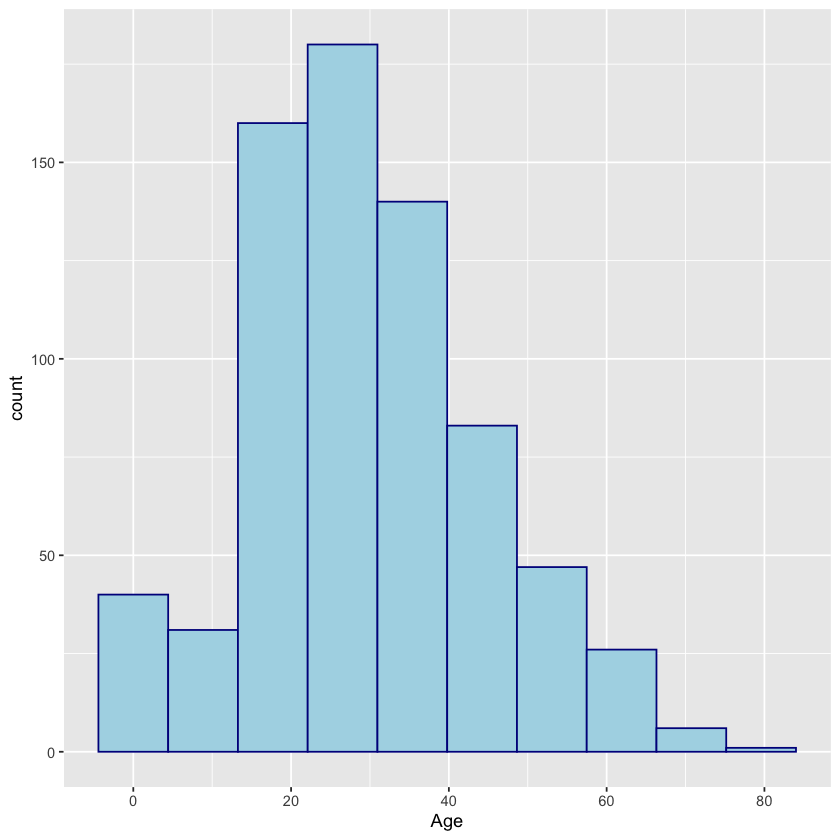

In [65]:
ggplot(titanic, aes(x=Age))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 10)


Create a new variable that will divide the passangers in four age categories:

- Babies: 0-5
- Children: 6-12 years old
- Young: 13-17 years old
- Adult: 18-59 years old
- Older: 60+ years old

How many (number and percent) survived on each age group? (We will use the mean function as the percentage)


In [66]:
titanic <- titanic %>% 
  mutate(
    # Create categories
    age_group = dplyr::case_when(
      Age <= 5              ~ "0-5",
      Age >= 6 & Age <= 12  ~ "6-12",
      Age >= 13 & Age <= 17 ~ "13-17",
      Age >= 18 & Age <= 59 ~ "18-59",
      Age >= 60             ~ "60+",
      is.na(Age)            ~ "unclassified"
        
    ),
    # Convert to factor
    age_group = factor(
      age_group,
      level = c("0-5", "6-12","13-17","18-59", "60+", "unclassified")
    )
  )

In [67]:
survivors_by_AgeGroup <- titanic %>% 
  group_by(age_group) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_AgeGroup

age_group,Survived_count,Survived_sum,Survived_mean
<fct>,<int>,<int>,<dbl>
0-5,44,31,0.7045455
6-12,25,9,0.3600000
13-17,44,21,0.4772727
18-59,575,222,0.3860870
60+,26,7,0.2692308
unclassified,177,52,0.2937853


#### Age-Gender Survival

Where there differences on survival by age group and gender?

In [68]:
survivors_by_S_AgeGroup <- titanic %>% 
  group_by(Sex, age_group) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_S_AgeGroup

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Sex,age_group,Survived_count,Survived_sum,Survived_mean
<fct>,<fct>,<int>,<int>,<dbl>
female,0-5,21,16,0.7619048
female,6-12,11,3,0.2727273
female,13-17,23,19,0.8260870
female,18-59,202,155,0.7673267
female,60+,4,4,1.0000000
female,unclassified,53,36,0.6792453
male,0-5,23,15,0.6521739
male,6-12,14,6,0.4285714
male,13-17,21,2,0.0952381


#### Passenger Class and Survival

Was there any difference in the survival among passangers by their ticket class (Pclass) ?

In [69]:
survivors_by_Pclass <- titanic %>% 
  group_by(Pclass) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_Pclass

Pclass,Survived_count,Survived_sum,Survived_mean
<int>,<int>,<int>,<dbl>
1,216,136,0.6296296
2,184,87,0.4728261
3,491,119,0.2423625


#### Traveling alone vs with family

Who survived more, individuals that traveled alone or those who traveled with their families?

In [70]:
titanic$TravelAlone <- titanic$SibSp + titanic$Parch == 0
survivors_by_TravelAlone <- titanic %>% 
  group_by(TravelAlone) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_TravelAlone

TravelAlone,Survived_count,Survived_sum,Survived_mean
<lgl>,<int>,<int>,<dbl>
FALSE,354,179,0.5056497
TRUE,537,163,0.3035382


#### Embarking port and survival

Was there any difference in survival related to the embarking port?

In [71]:
survivors_by_Embarked <- titanic %>% 
  group_by(Embarked) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_Embarked[2:4,]

Embarked,Survived_count,Survived_sum,Survived_mean
<fct>,<int>,<int>,<dbl>
C,168,93,0.5535714
Q,77,30,0.3896104
S,644,217,0.3369565


#### Paid fair and survival

What was the fare range paid by the passangers?

In [72]:
rm_na <- titanic[!is.na(titanic$Fare), ]
sum_Fare <- summary(rm_na$Fare)
sd_Fare <- sd(rm_na$Fare)
len_Fare <- length(rm_na$Fare)
sum_Fare <- c(sum_Fare, c(sd = sd_Fare, count = len_Fare))
sum_Fare <- as.matrix(sum_Fare)
sum_Fare

Min.,0.00000
1st Qu.,7.91040
Median,14.45420
Mean,32.20421
3rd Qu.,31.00000
Max.,512.32920
sd,49.69343
count,891.00000


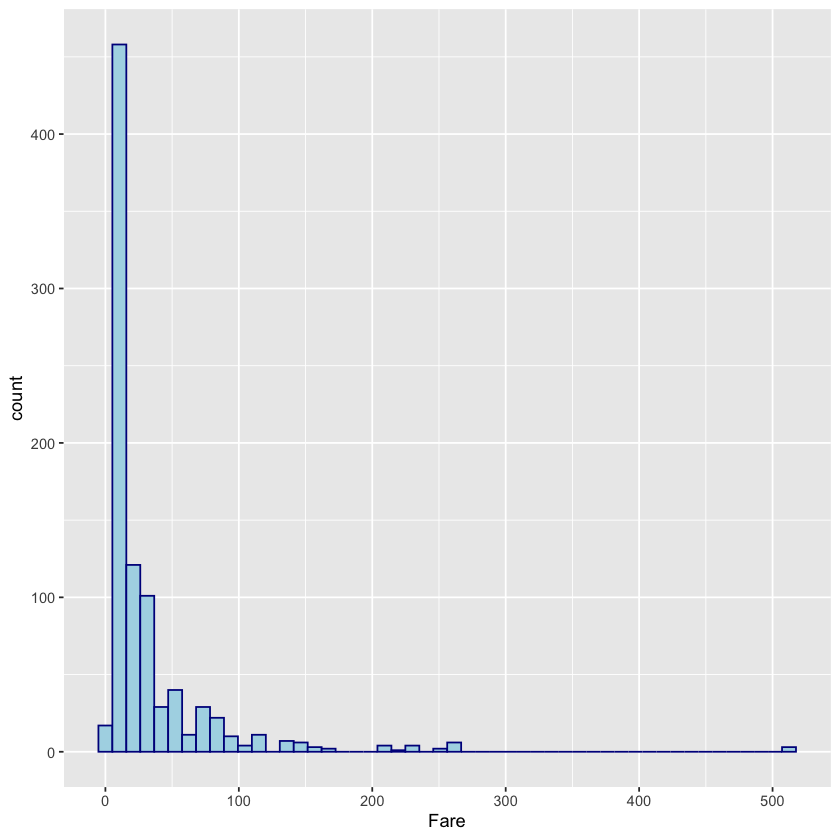

In [73]:
ggplot(titanic, aes(x=Fare))+
  geom_histogram(color="darkblue", fill="lightblue", bins = 50)

How many individuals didn't paid for their ticket?
 
Does this affected their survival?

In [74]:
sum(titanic$Fare == 0)

[1] 15

In [75]:
titanic$Gratis <- titanic$Fare == 0
survivors_by_Gratis <- titanic %>% 
  group_by(Gratis) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_Gratis

Gratis,Survived_count,Survived_sum,Survived_mean
<lgl>,<int>,<int>,<dbl>
FALSE,876,341,0.38926941
TRUE,15,1,0.06666667


Where there differences in fare rates among the same ticket classes? 
 
If the answer was yes, does those differences affected the survival of individuals?


In [76]:
byPclass <- titanic %>%
  group_by(Pclass) %>%   
        summarise(count=n(),
            mean = mean(Fare,na.rm=TRUE),
            sd = sd(Fare,na.rm=TRUE),
            min = min(Fare,na.rm=TRUE),
            "25%" = quantile(Fare, probs = .25, na.rm = TRUE),
            "50%" = median(Fare,na.rm=TRUE),
            "75%" = quantile(Fare, probs = .75, na.rm = TRUE),
            max = max(Fare,na.rm=TRUE))
byPclass

Pclass,count,mean,sd,min,25%,50%,75%,max
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,216,84.15469,78.38037,0,30.92395,60.2875,93.5,512.3292
2,184,20.66218,13.41740,0,13.00000,14.2500,26.0,73.5000
3,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500


In [77]:
df1 <- titanic %>% 
select(Survived, Pclass, Fare)
result <-  full_join(df1, byPclass, 
                       by = c("Pclass" = "Pclass"))
result <- result %>% 
  mutate(
    # Create categories
    FareGroup = dplyr::case_when(
      Fare > result$`75%`  ~ "Overpaid",
      Fare < result$`25%`  ~ "Underpaid",
      Fare <= result$`75%` & Fare >= result$`25%` ~ "Normal",
    ),
    # Convert to factor
    FareGroup = factor(
      FareGroup,
      level = c("Overpaid", "Underpaid","Normal")
    )
  )
result

Survived,Pclass,Fare,count,mean,sd,min,25%,50%,75%,max,FareGroup
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3,7.2500,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Underpaid
1,1,71.2833,216,84.15469,78.38037,0,30.92395,60.2875,93.5,512.3292,Normal
1,3,7.9250,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Normal
1,1,53.1000,216,84.15469,78.38037,0,30.92395,60.2875,93.5,512.3292,Normal
0,3,8.0500,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Normal
0,3,8.4583,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Normal
0,1,51.8625,216,84.15469,78.38037,0,30.92395,60.2875,93.5,512.3292,Normal
0,3,21.0750,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Overpaid
1,3,11.1333,491,13.67555,11.77814,0,7.75000,8.0500,15.5,69.5500,Normal


Now we will check how many survived by Pclass and Fategroup:


In [78]:
Pclass_FareGroup <- result %>% 
  group_by(Pclass, FareGroup) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
Pclass_FareGroup

`summarise()` has grouped output by 'Pclass'. You can override using the
`.groups` argument.


Pclass,FareGroup,Survived_count,Survived_sum,Survived_mean
<int>,<fct>,<int>,<int>,<dbl>
1,Overpaid,53,39,0.7358491
1,Underpaid,54,25,0.4629630
1,Normal,109,72,0.6605505
2,Overpaid,39,23,0.5897436
2,Underpaid,42,13,0.3095238
2,Normal,103,51,0.4951456
3,Overpaid,120,34,0.2833333
3,Underpaid,94,17,0.1808511
3,Normal,277,68,0.2454874


## The title passanger had and survival
Which were the five most common titles passanger had? (Sir, Mr, Mrs, etc)?
For this part we will take the ‘Name’ column and will split all the words in the name by the white space.
Then we will join all the words and calculate the frequency of appearance of each world in descending order.
We will take the five most common words (must be titles), and with them we will create a new column. Then we will procede as we did in the other analyses.

In [79]:
words <- titanic$Name
words <- gsub("[[:punct:]]", "", words)  

In [80]:
newvector <- table(unlist(strsplit(as.character(words), " ")))
names_dis <- as.data.frame(newvector) %>% 
    arrange(desc(Freq)) 
names_dis

Var1,Freq
<fct>,<int>
Mr,521
Miss,182
Mrs,129
William,64
John,44
Master,40
Henry,35
George,24
James,24


 We have shown here that the most common titles were Mr (521), Miss (182), Mrs (129) 
 and Master (40). This totals 872 out of 891 passengers (97.9%).
 Now we will create a new variable with those titles and check for differences on 
 survival among them.

In [81]:
titanic <- titanic %>% 
  mutate(
    # Create categories
    Titel = dplyr::case_when(
        grepl("Master", Name)   ~"Master",
        grepl("Miss", Name)     ~"Miss",
        grepl("Mrs", Name)      ~"Mrs",
        grepl("Mr", Name)       ~"Mr",
    ),
    # Convert to factor
    Titel = factor(
      Titel,
      level = c("Master", "Miss","Mr","Mrs","Outer")
    )
  )
titanic$Titel <- as.character(titanic$Titel)
titanic$Titel <- ifelse(is.na(titanic$Titel),"Outer",titanic$Titel)

In [82]:
survivors_by_names <- titanic %>% 
  group_by(Titel) %>% 
  summarise(Survived_count=n(),
            Survived_sum = sum(Survived, na.rm=T),
            Survived_mean = mean(Survived,na.rm=T)
)
survivors_by_names

Titel,Survived_count,Survived_sum,Survived_mean
<chr>,<int>,<int>,<dbl>
Master,40,23,0.5750000
Miss,182,127,0.6978022
Mr,518,82,0.1583012
Mrs,127,101,0.7952756
Outer,24,9,0.3750000
